In [1]:
# load dependencies
import random
import pandas as pd
import utils_openml
import utils_kaggle
import utils_comparison

# configuration sample
random.seed(14032025)
sample_size = 100


In [2]:
## OpenML
# manual gathering of 'tabular' search results
openml_df = pd.read_excel('openml_tabular_datasets.xlsx')
openml_df = openml_df.drop_duplicates(subset=['Name'])
openml_df_ids = openml_df['ID'].astype(int).tolist()

# creating metadata df
openml_metadata = utils_openml.create_metadata(openml_df_ids)
openml_metadata['modus'] = 'openml'

In [ ]:
## Kaggle Tags
# get random ids of 'tabular' tag results
ids_tags = utils_kaggle.search_datasets_tags(tags_id = '14101-Tabular')
sample_ids_tags = random.sample(ids_tags, sample_size)

# creating metadata df
kaggle_tags_metadata = utils_kaggle.create_metadata(sample_ids_tags, './kaggle_data_tags')
kaggle_tags_metadata['modus'] = 'kaggle_tags'

In [ ]:
## Kaggle Search
# get random ids of 'tabular' search results
ids_search = utils_kaggle.search_datasets(search_term = 'tabular')
sample_ids_search = random.sample(ids_search, sample_size)

# creating metadata df
kaggle_search_metadata = utils_kaggle.create_metadata(sample_ids_search, './kaggle_data_search')
kaggle_search_metadata['modus'] = 'kaggle_search'

In [ ]:
## Merge Metadata
metadata = pd.concat([openml_metadata, kaggle_tags_metadata, kaggle_search_metadata])
metadata.groupby('modus').size() # count files per modus

In [2]:
metadata = pd.read_csv('metadata.csv')


In [4]:
## Summarize gathered metadata grouped by modus
utils_comparison.summarize_statistics(metadata) 

,modus,mean_instances,median_instances,mean_features,median_features,mean_missing_values,pct_with_missing,pct_numeric_features,pct_categorical_features
0,kaggle_search,34513.38,2000.0,14.80,7.0,245319.09,39.88,44.53,55.47
1,kaggle_tags,122508.87,3279.0,43.68,12.0,125656.99,43.75,61.87,38.13
2,openml,234520.26,20637.0,50.36,14.0,125765.54,16.30,76.37,12.14


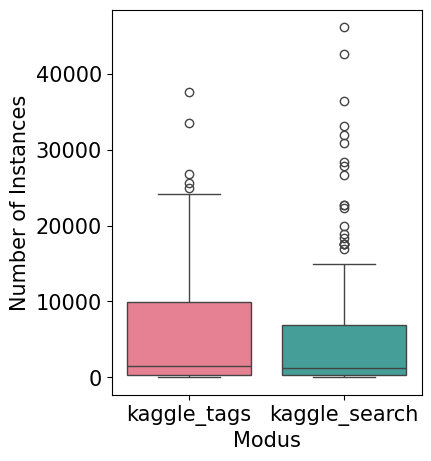

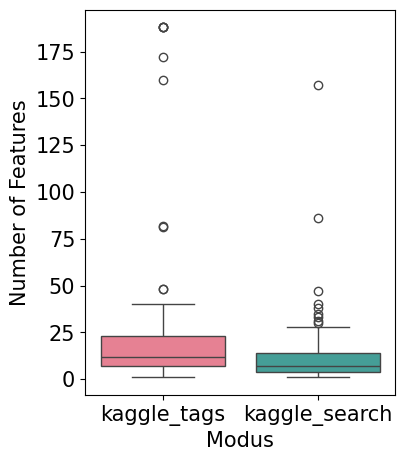

In [3]:
## Kaggle
# univariate distributions of instance and feature number without outlier
metadata_kaggle = metadata[metadata['modus'] != 'openml']
utils_comparison.grouped_boxplot(metadata_kaggle[metadata_kaggle['num_instances']<50000], 'num_instances', 'Number of Instances', group_col = 'modus')
utils_comparison.grouped_boxplot(metadata_kaggle[metadata_kaggle['num_features']<250], 'num_features', 'Number of Features', group_col = 'modus')

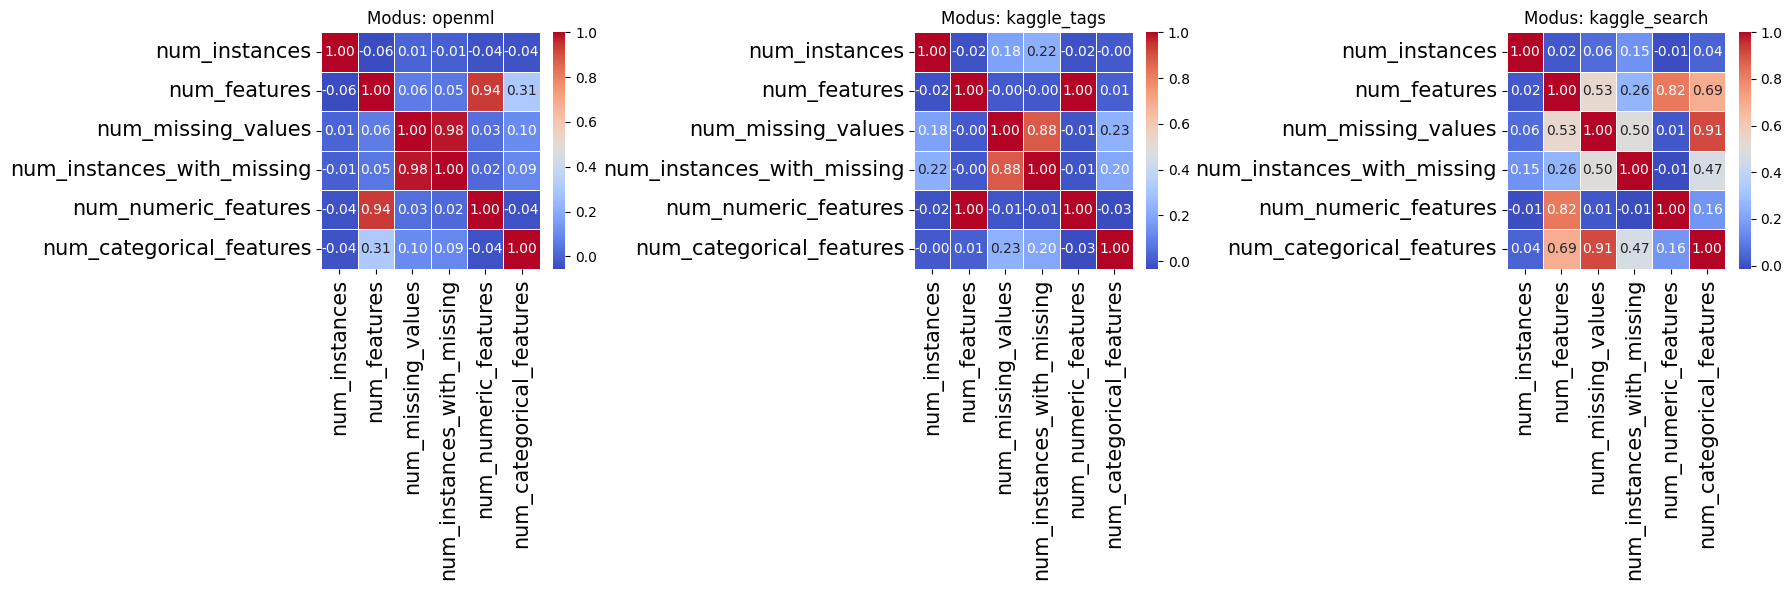

In [4]:
## Overall
# grouped meta data correlation heatmap
utils_comparison.correlation_heatmaps(metadata)

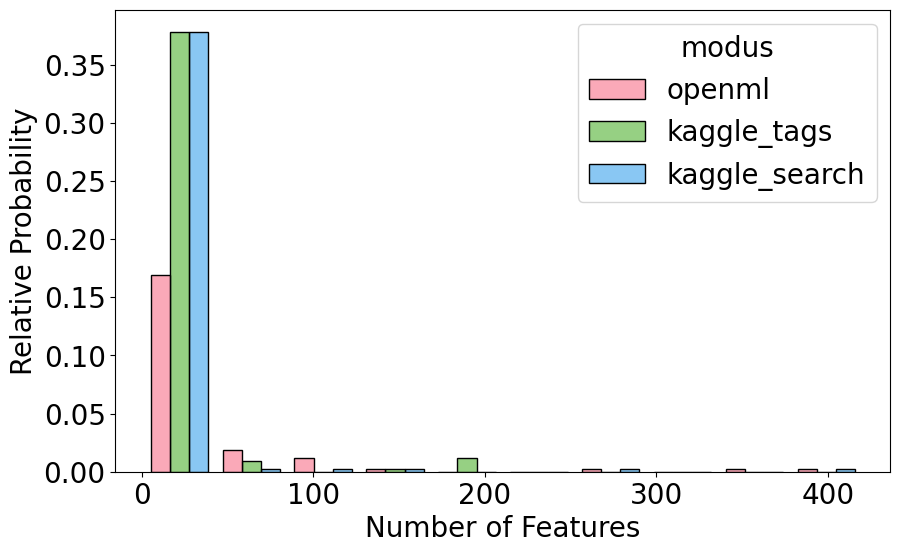

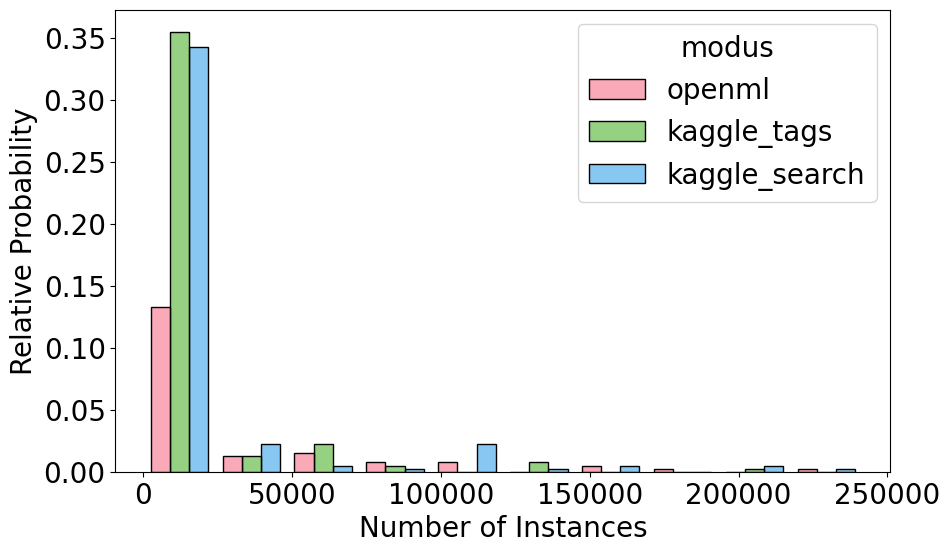

In [ ]:
## Overall
# grouped histograms for the number of features and instances gathered without outlier
utils_comparison.grouped_histogram(metadata[metadata['num_features']<500], 'num_features', 'Number of Features')
utils_comparison.grouped_histogram(metadata[metadata['num_instances']<250000], 'num_instances', 'Number of Instances')